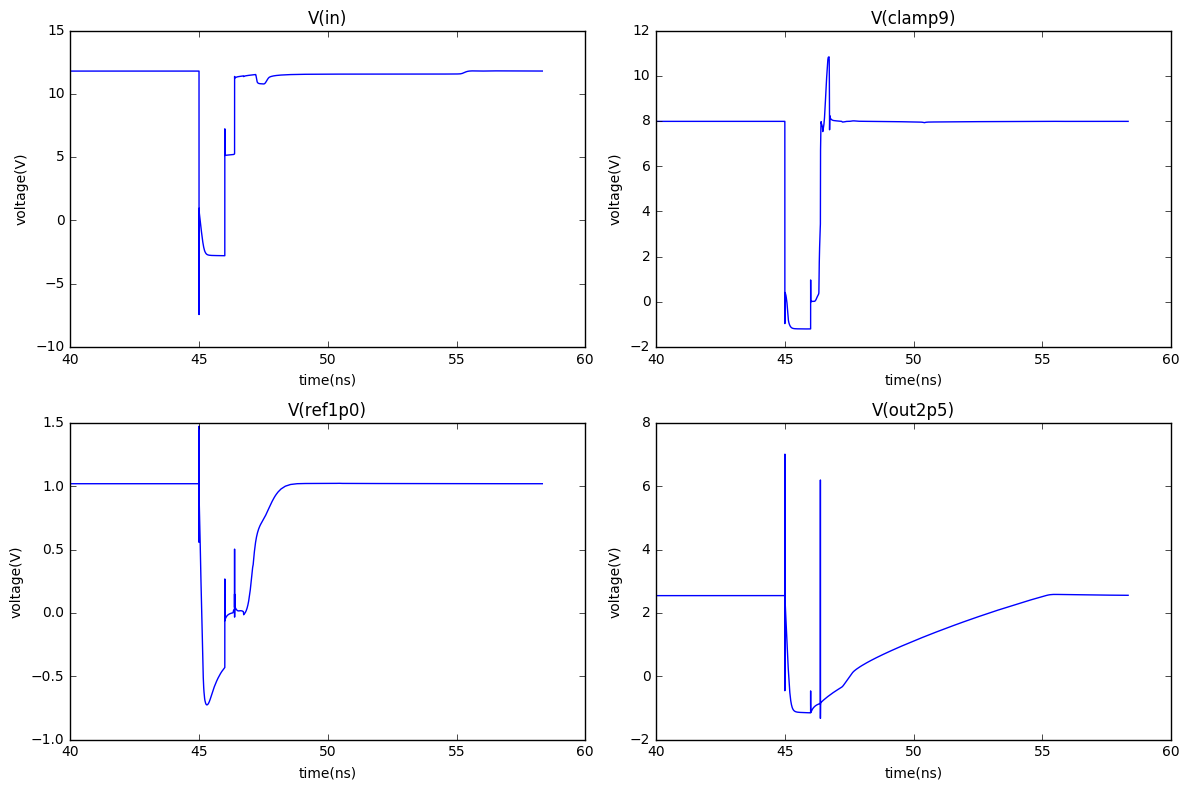

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import matplotlib as mp

# Read simulation files
def datafileread(measurename,skipfirstrows):
    # Reading Datafiles
    path = measurename
    data = np.genfromtxt(path,
                        skip_header=skipfirstrows,
                        delimiter=',',
                        dtype=(float,float),
                        unpack=True)
    return data

# measurement
name = 'total_vin.csv'
name = 'total_vin_30V_1u.csv'
a,b,x,vin, v2p5, vc9, v1p0 = datafileread(name,15)
x *= 1e6

start = 500
end = -20
x    = x[start:end]
vin  = vin[start:end]
v2p5 = v2p5[start:end]
vc9  = vc9[start:end]
v1p0 = v1p0[start:end]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8))
#
ax1.plot(x,vin)
ax1.set_title('V(in)')
ax1.set_xlabel('time(ns)')
ax1.set_ylabel('voltage(V)')
#
ax2.plot(x, vc9)
ax2.set_title('V(clamp9)')
ax2.set_xlabel('time(ns)')
ax2.set_ylabel('voltage(V)')
#
ax3.plot(x, v1p0)
ax3.set_title('V(ref1p0)')
ax3.set_xlabel('time(ns)')
ax3.set_ylabel('voltage(V)')
#
ax4.plot(x, v2p5)
ax4.set_title('V(out2p5)')
ax4.set_xlabel('time(ns)')
ax4.set_ylabel('voltage(V)')
#
plt.tight_layout()
plt.savefig("../../src/4/figures/total_simulation_30V_1u.png", pad_inches=0.3)
plt.show()